# Hamon: Pagsusuri ng Teksto tungkol sa Data Science

Sa halimbawang ito, gagawin natin ang isang simpleng ehersisyo na sumasaklaw sa lahat ng hakbang ng tradisyunal na proseso ng data science. Hindi mo kailangang magsulat ng anumang code, maaari mo lamang i-click ang mga cell sa ibaba upang maisagawa ang mga ito at obserbahan ang resulta. Bilang hamon, hinihikayat kang subukan ang code na ito gamit ang iba't ibang datos.

## Layunin

Sa araling ito, tinalakay natin ang iba't ibang konsepto na may kaugnayan sa Data Science. Subukan nating tuklasin ang higit pang mga kaugnay na konsepto sa pamamagitan ng paggawa ng **text mining**. Magsisimula tayo sa isang teksto tungkol sa Data Science, kukunin ang mga keyword mula rito, at pagkatapos ay susubukan nating i-visualize ang resulta.

Bilang teksto, gagamitin ko ang pahina tungkol sa Data Science mula sa Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Hakbang 1: Pagkuha ng Datos

Ang unang hakbang sa bawat proseso ng data science ay ang pagkuha ng datos. Gagamitin natin ang `requests` library para dito:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Hakbang 2: Pagbabago ng Datos

Ang susunod na hakbang ay ang pag-convert ng datos sa anyo na angkop para sa pagproseso. Sa ating kaso, nag-download tayo ng HTML source code mula sa pahina, at kailangan natin itong gawing plain text.

Maraming paraan para magawa ito. Gagamitin natin ang pinakasimpleng built-in na [HTMLParser](https://docs.python.org/3/library/html.parser.html) object mula sa Python. Kailangan nating mag-subclass sa `HTMLParser` class at tukuyin ang code na magko-collect ng lahat ng teksto sa loob ng HTML tags, maliban sa `<script>` at `<style>` tags.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Hakbang 3: Pagkuha ng Mga Insight

Ang pinakamahalagang hakbang ay ang gawing anyo ang ating data kung saan makakakuha tayo ng mga insight. Sa ating kaso, nais nating kumuha ng mga keyword mula sa teksto, at tingnan kung aling mga keyword ang mas makabuluhan.

Gagamit tayo ng Python library na tinatawag na [RAKE](https://github.com/aneesha/RAKE) para sa pagkuha ng mga keyword. Una, i-install natin ang library na ito kung sakaling wala pa ito:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Ang pangunahing functionality ay available mula sa `Rake` na object, na maaari nating i-customize gamit ang ilang mga parameter. Sa ating kaso, itatakda natin ang minimum na haba ng isang keyword sa 5 karakter, ang minimum na dalas ng isang keyword sa dokumento sa 3, at ang maximum na bilang ng mga salita sa isang keyword - sa 2. Malaya kang mag-eksperimento sa ibang mga halaga at obserbahan ang resulta.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Nakuha namin ang isang listahan ng mga termino kasama ang kaukulang antas ng kahalagahan. Gaya ng makikita mo, ang mga pinaka-nauugnay na disiplina, tulad ng machine learning at big data, ay nasa mga nangungunang posisyon sa listahan.

## Hakbang 4: Pagpapakita ng Resulta

Mas nauunawaan ng mga tao ang datos kapag ito ay nasa anyong biswal. Kaya’t madalas na may saysay na i-visualize ang datos upang makakuha ng ilang mga pananaw. Maaari nating gamitin ang `matplotlib` library sa Python upang mag-plot ng simpleng distribusyon ng mga keyword kasama ang kanilang kaugnayan:


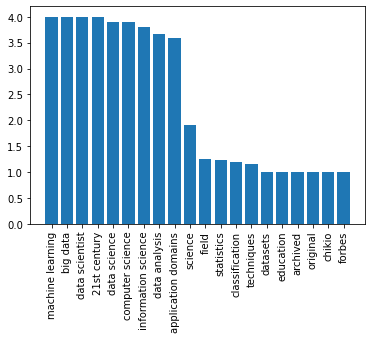

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Mayroon, gayunpaman, mas mahusay na paraan upang maipakita ang dalas ng mga salita - gamit ang **Word Cloud**. Kailangan nating mag-install ng isa pang library upang maipakita ang word cloud mula sa ating listahan ng mga keyword.


In [71]:
!{sys.executable} -m pip install wordcloud

Ang `WordCloud` na object ay responsable sa pagtanggap ng alinman sa orihinal na teksto, o pre-computed na listahan ng mga salita kasama ang kanilang mga dalas, at nagbabalik ng isang imahe, na maaaring ipakita gamit ang `matplotlib`:


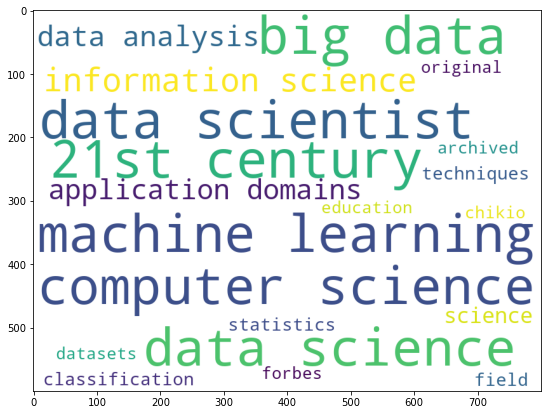

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Maaari rin nating ipasa ang orihinal na teksto sa `WordCloud` - tingnan natin kung makakakuha tayo ng katulad na resulta:


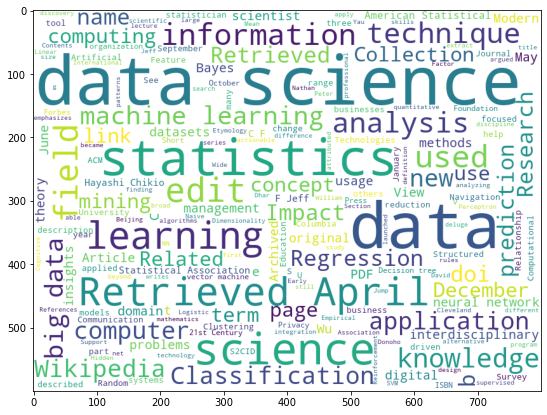

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Makikita mo na mas kahanga-hanga na ang word cloud ngayon, ngunit naglalaman din ito ng maraming ingay (halimbawa, mga hindi kaugnay na salita tulad ng `Retrieved on`). Bukod dito, mas kaunti ang mga keyword na binubuo ng dalawang salita, tulad ng *data scientist* o *computer science*. Ito ay dahil mas mahusay ang RAKE algorithm sa pagpili ng magagandang keyword mula sa teksto. Ipinapakita ng halimbawang ito ang kahalagahan ng pag-pre-process at paglilinis ng data, dahil ang malinaw na larawan sa dulo ay magbibigay-daan sa atin na makagawa ng mas mahusay na mga desisyon.

Sa ehersisyong ito, dumaan tayo sa isang simpleng proseso ng pagkuha ng kahulugan mula sa teksto ng Wikipedia, sa anyo ng mga keyword at word cloud. Ang halimbawang ito ay medyo simple, ngunit mahusay nitong ipinapakita ang mga karaniwang hakbang na ginagawa ng isang data scientist kapag nagtatrabaho sa data, simula sa pagkuha ng data hanggang sa visualization.

Sa ating kurso, tatalakayin natin nang detalyado ang lahat ng mga hakbang na ito.



---

**Paunawa**:  
Ang dokumentong ito ay isinalin gamit ang AI translation service na [Co-op Translator](https://github.com/Azure/co-op-translator). Bagama't sinisikap naming maging tumpak, pakitandaan na ang mga awtomatikong pagsasalin ay maaaring maglaman ng mga pagkakamali o hindi pagkakatugma. Ang orihinal na dokumento sa orihinal nitong wika ang dapat ituring na opisyal na sanggunian. Para sa mahalagang impormasyon, inirerekomenda ang propesyonal na pagsasalin ng tao. Hindi kami mananagot sa anumang hindi pagkakaunawaan o maling interpretasyon na maaaring magmula sa paggamit ng pagsasaling ito.
